В файле k_means_specific_sample реализована стратегия выбора центров из нашей выборки.

In [53]:
import numpy as np
import matplotlib.pyplot as pl
import randomt
import scipy as sc

Задаем выборку из n точек

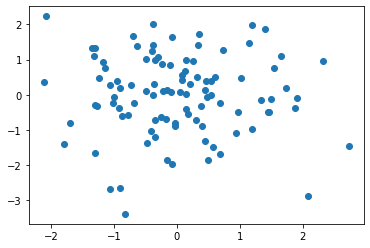

In [54]:
k = 4
n = 100
data = np.random.randn(n, 2) # наши точки
plt.scatter(data[:,0], data[:, 1])

Для 2 случая, т.е. когда выбираем центры из заданной выборки, реализуем стратегию:

1.Случайно выберем 1 центр из нашей выборки

2.Находим расстояния от 1 центра до каждой точки. Точку с максимальным расстоянием объявляем 2 центром. 

3.Для нахожения последующих центров считаем сумму расстояний от уже известных центров до каждой точки данных и точку с максимальной суммой расстояние объявляем i-ым центром.

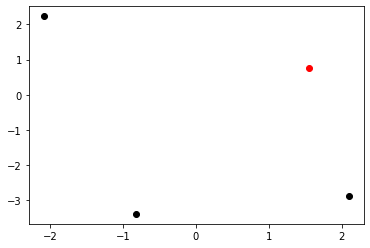

In [86]:
c = np.zeros((k, 2))
summа_S = [0] * n
index = random.randint(0, n - 1) # номер точки, которая будет первым центром на 1 шаге
c[0] = data[index]
plt.scatter(c[0, 0], c[0, 1], color = 'r')
for center_num in range(1, k): #center_num кол-во инициализированных центров
    for i in range(n): 
        p = (data[i][0] - c[center_num - 1][0]) ** 2 + (data[i][1] - c[center_num - 1][1]) ** 2
        if(p == 0): 
            summа_S[i] = 0
        summа_S[i] += p
    index = summа_S.index(max(summа_S)) #номер точки, до которой максимальная сумма рстояний от других центров
    c[center_num] = data[index]# происходит инициализация центров из выборки data
plt.scatter(c[1:, 0], c[1:, 1], color = 'k')

11


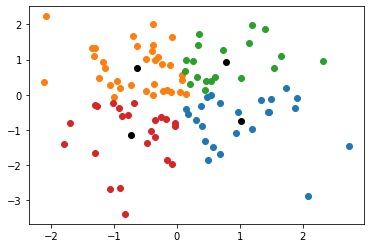

In [78]:
S = list(range(k)) # расстояние
cc = 0
cm_x = 0.0 # центр масс по x
cm_y = 0.0 # центра масс по y
cluster = np.random.randn(k, n, 2)
cm = np.random.randn(k, 2)
flag = 0 # чтобы на первом шаге не считать центр масс
flag_c = 0 # для центров
size = np.zeros(k) # размеры кластеров
while(flag_c == 0):
    if(flag == 1): # чтобы не войти на 1 шаге
        for p in range(k): # движение по кластерам
            if(size[p] == 0):
                break
            for l in range(int(size[p])): # двигаемся по элементам кластера
                cm_x = cm_x + cluster[p][l][0]
                cm_y = cm_y + cluster[p][l][1]
            c[p][0] = cm[p][0]
            c[p][1] = cm[p][1]
            cm[p][0] = cm_x / size[p] # нашли новый центр масс
            cm[p][1] = cm_y / size[p] # нашли новый центр масс
            cm_x = 0
            cm_y = 0
        flag_c = 1
        for u in range(k):
            if((c[u][0] - cm[u][0] > 0.0000001) or (c[u][1] - cm[u][1] > 0.0000001)):
                flag_c = 0
                break
        size = np.zeros(k) # так как на каждом шаге мы пересобираем кластеры, то их кол-во надо обнулять
        for i in range(n):
            for t in range(k):
                S[t] = (cm[t][0] - data[i][0]) ** 2 + (cm[t][1] - data[i][1]) ** 2
            index_cl = S.index(min(S))
            cluster[index_cl][int(size[index_cl])][0] = data[i][0]
            cluster[index_cl][int(size[index_cl])][1] = data[i][1]
            size[S.index(min(S))] += 1
    else:
        for i in range(n):
            for t in range(k):
                S[t] = (c[t][0] - data[i][0]) ** 2 + (c[t][1] - data[i][1]) ** 2
            index_cl = S.index(min(S))
            cluster[index_cl][int(size[index_cl])][0] = data[i][0]
            cluster[index_cl][int(size[index_cl])][1] = data[i][1]
            size[S.index(min(S))] += 1 #увеличиваем размер кластера
        flag = 1
    cc += 1
print(cc)
plt.scatter(cm[:,0], cm[:, 1], color = 'k')
for i in range(k):
    plt.scatter(cluster[i][:int(size[i]), 0], cluster[i][:int(size[i]), 1])
c = np.zeros((k,2))

Считаем среднее арифметическое итераций основного цикла нашего алгоритма, запустив его 5 раз.

In [79]:
print((8+13+8+9+11)/5)

9.8
